# Customer Segmentation

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)

# Dealing with Dataset

In [3]:
data = pd.read_csv(r'mall_customer.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
len(data)

200

In [7]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Data Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The feature "Gender" is an object type, since it is a categorical variable in string type.

In [9]:
data.describe().round(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [10]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values and no null values, so there is no need for data preprocessing.

In [11]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# Renaming the feature names

data = data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Visualization

## Correlation

In [13]:
correlation = data.corr()
correlation

<ipython-input-13-521f87fcc686>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,CustomerID,Age,Annual_Income,Spending_Score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual_Income,0.977548,-0.012398,1.000000,0.009903
Spending_Score,0.013835,-0.327227,0.009903,1.000000


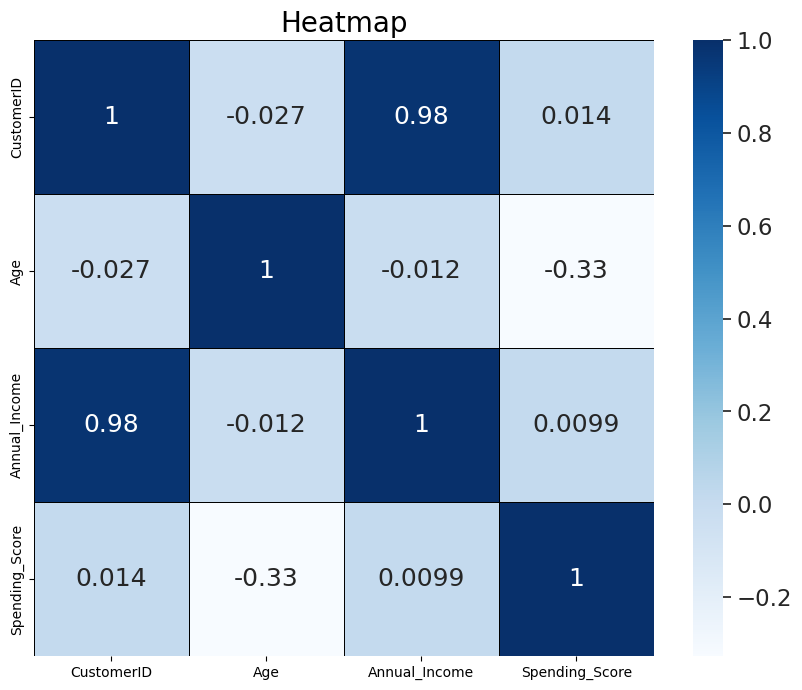

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)

ax = sns.heatmap(correlation, cmap = 'Blues', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap', fontsize = 20)
plt.show()

## Value Counts

In [15]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

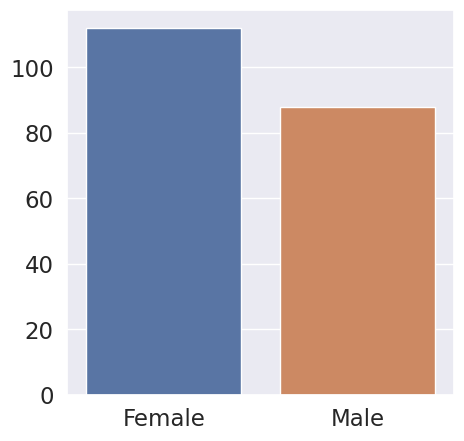

In [16]:
gender = data.Gender.value_counts()

sns.set_style("darkgrid")
plt.figure(figsize=(5,5))
sns.barplot(x=gender.index, y=gender.values)
plt.show()

In [17]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

### Statistical Analysis for the feature "**Age**"

In [18]:
data['Age'].describe().round()

count    200.0
mean      39.0
std       14.0
min       18.0
25%       29.0
50%       36.0
75%       49.0
max       70.0
Name: Age, dtype: float64

### Distribution of **Age**

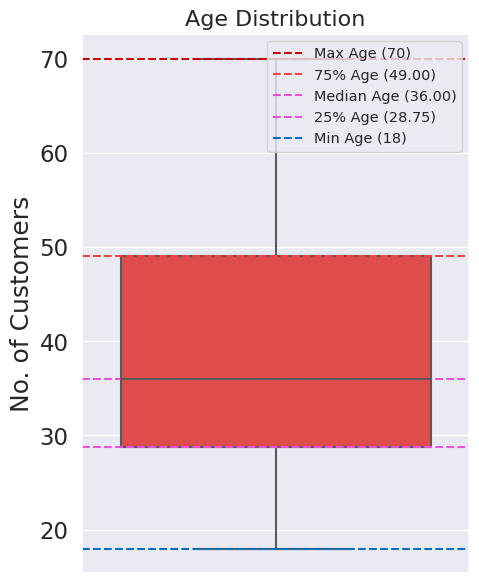

In [19]:
fig, ax = plt.subplots(figsize=(5,7))
# sets the font scale of the seaborn library to 1.5.
sns.set(font_scale=1.5)

# creates a box plot with the y-axis showing the "Age" column of the "data" dataframe, using a red color
ax = sns.boxplot(y=data["Age"], color="#f73434")

# add horizontal lines to the plot at the maximum age, 75th percentile, median, 25th percentile, and minimum age of the dataset,
# using specified colors and labels
ax.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({data.Age.min()})')

ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')
plt.title('Age Distribution', fontsize = 16)
plt.show()

# This is a Python f-string expression that formats a floating-point number to two decimal places.
# It retrieves the 75th percentile value of the "Age" column from the "data" dataframe using the describe() method and indexing with the [6]
# bracket notation, and then formats it to a string with two decimal places using the :.2f formatting specifier.
# This formatted string is used in the label of one of the horizontal lines on the box plot.

In [20]:
# Count of customers according to the age

data['Age'].value_counts().head()

32    11
35     9
19     8
31     8
30     7
Name: Age, dtype: int64

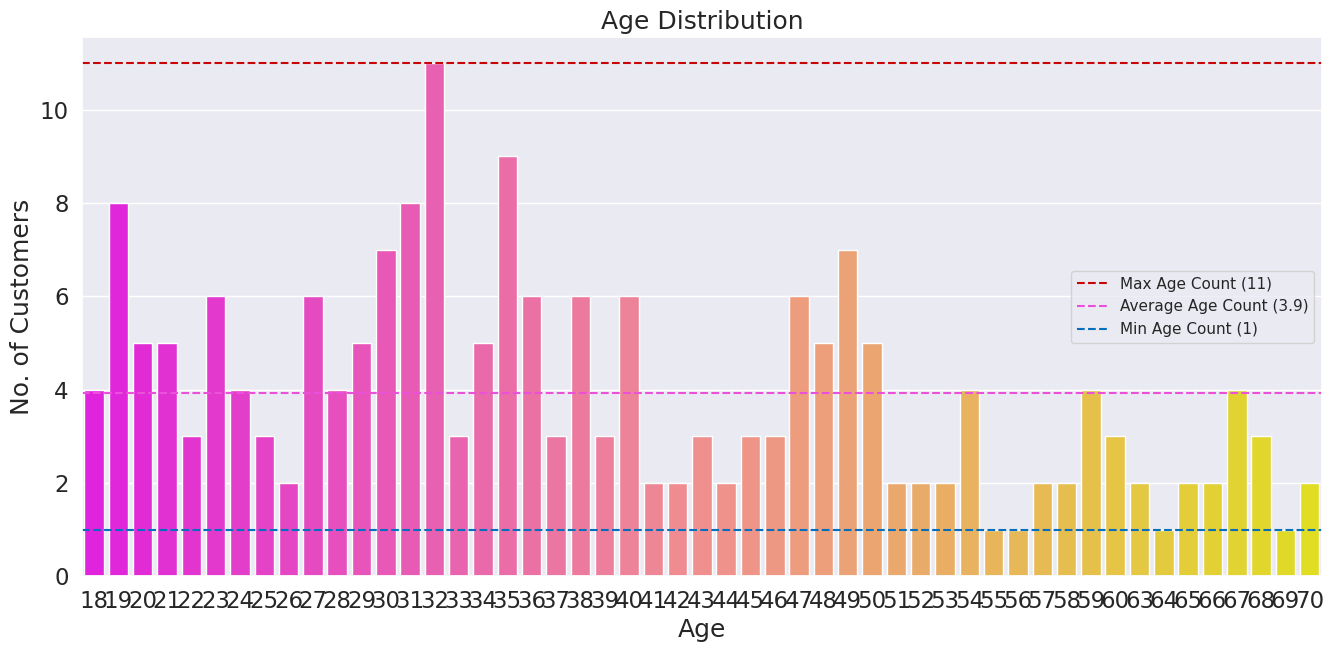

In [21]:
fig, ax = plt.subplots(figsize=(16,7))
sns.set(font_scale=1.0)
ax = sns.countplot(x=data['Age'], palette='spring')
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--',color='#c90404', label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--',color='#eb50db', label=f'Average Age Count ({data.Age.value_counts().mean():.1f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--',color='#046ebf', label=f'Min Age Count ({data.Age.value_counts().min()})')

ax.legend(loc ='right')
ax.set_ylabel('No. of Customers')
plt.title('Age Distribution', fontsize = 18)
plt.show()

#### Age Distribution of "**Male**" and "**Female**" separately

In [22]:
# Age statistical analysis of Male customers

data[data['Gender']=='Male']['Age'].describe().round()

count    88.0
mean     40.0
std      16.0
min      18.0
25%      28.0
50%      37.0
75%      50.0
max      70.0
Name: Age, dtype: float64

In [23]:
# Age statistical analysis of Female customers

data[data['Gender']=='Female']['Age'].describe().round()

count    112.0
mean      38.0
std       13.0
min       18.0
25%       29.0
50%       35.0
75%       48.0
max       68.0
Name: Age, dtype: float64

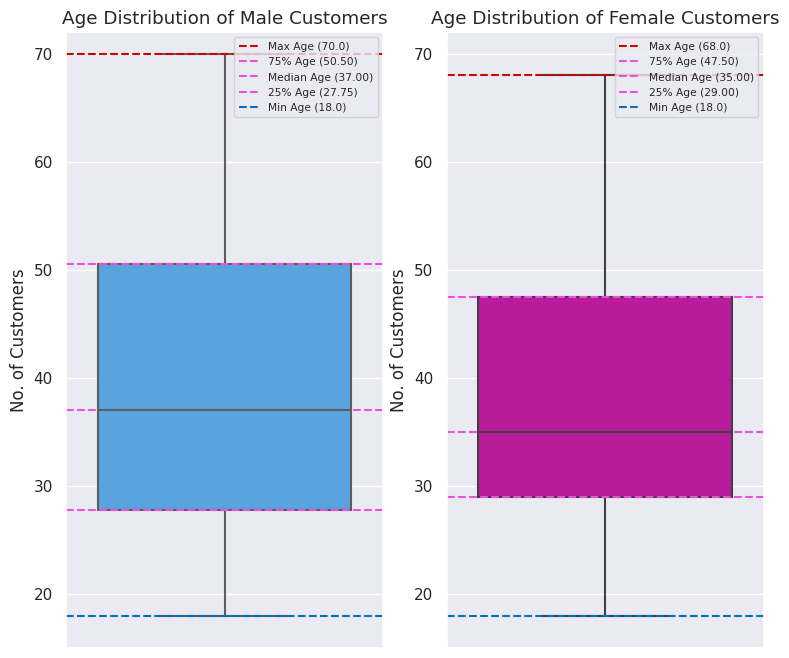

In [24]:
data_male = data[data['Gender']=='Male']['Age'].describe()
data_female = data[data['Gender']=='Female']['Age'].describe()

fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(9,8))
sns.set(font_scale=1.1)

sns.boxplot(y=data[data['Gender']=='Male']['Age'], color="#42a7f5", ax=ax0)

ax0.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data_male[7]})')
ax0.axhline(y=data_male[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_male[6]:.2f})')
ax0.axhline(y=data_male[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_male[5]:.2f})')
ax0.axhline(y=data_male[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_male[4]:.2f})')
ax0.axhline(y=data_male[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_male[3]})')
ax0.legend(fontsize='xx-small', loc='upper right')
ax0.set(ylabel='No. of Customers', title='Age Distribution of Male Customers')
ax0.set_ylim(15,72)

ax1 = sns.boxplot(y=data[data['Gender']=='Female']['Age'], color="#d400ad", ax=ax1)
ax1.axhline(y=data_female[7], linestyle='--',color='#c90404', label=f'Max Age ({data_female[7]})')
ax1.axhline(y=data_female[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_female[6]:.2f})')
ax1.axhline(y=data_female[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_female[5]:.2f})')
ax1.axhline(y=data_female[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_female[4]:.2f})')
ax1.axhline(y=data_female[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_female[3]})')

ax1.legend(fontsize='xx-small', loc='upper right')
ax1.set(ylabel='No. of Customers', title='Age Distribution of Female Customers')
ax1.set_ylim(15,72)
plt.show()

## Analysing the feature "**Annual Income**"

In [25]:
# the feature "Annual_Income" is in 'k$'

data['Annual_Income'].head()

0    15
1    15
2    16
3    16
4    17
Name: Annual_Income, dtype: int64

In [26]:
data['Annual_Income'].describe().round(2)

count    200.00
mean      60.56
std       26.26
min       15.00
25%       41.50
50%       61.50
75%       78.00
max      137.00
Name: Annual_Income, dtype: float64

Analysing the "Annual Income" feature with the customers for outliers.

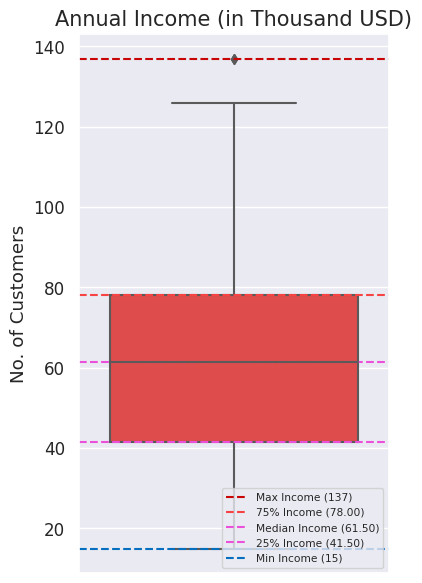

In [27]:
fig, ax = plt.subplots(figsize=(4,7))
sns.set(font_scale=1.1)
ax = sns.boxplot(y=data["Annual_Income"], color="#f73434")

ax.axhline(y=data["Annual_Income"].max(), linestyle='--',color='#c90404', label=f'Max Income ({data.Annual_Income.max()})')
ax.axhline(y=data["Annual_Income"].describe()[6], linestyle='--',color='#f74343', label=f'75% Income ({data.Annual_Income.describe()[6]:.2f})')
ax.axhline(y=data["Annual_Income"].median(), linestyle='--',color='#eb50db', label=f'Median Income ({data.Annual_Income.median():.2f})')
ax.axhline(y=data["Annual_Income"].describe()[4], linestyle='--',color='#eb50db', label=f'25% Income ({data.Annual_Income.describe()[4]:.2f})')
ax.axhline(y=data["Annual_Income"].min(), linestyle='--',color='#046ebf', label=f'Min Income ({data.Annual_Income.min()})')

ax.legend(fontsize='xx-small', loc='lower right')
ax.set_ylabel('No. of Customers')
plt.title('Annual Income (in Thousand USD)', fontsize = 15)
plt.show()

Count of customers with respect to annual income

In [28]:
data['Annual_Income'].value_counts().head()

54    12
78    12
48     6
71     6
63     6
Name: Annual_Income, dtype: int64

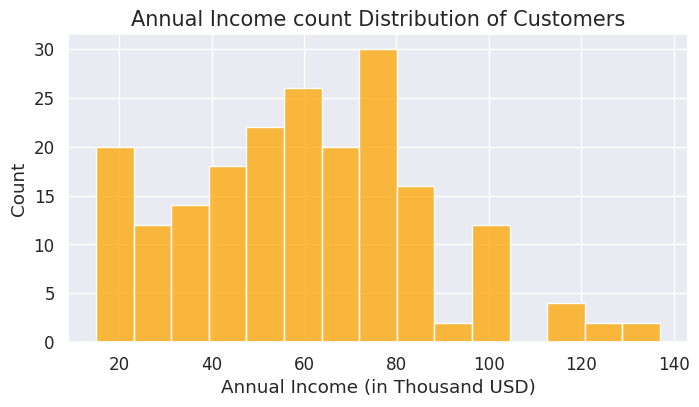

In [29]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set(font_scale=1.0)

ax = sns.histplot(data['Annual_Income'], bins=15, ax=ax, color='orange')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Annual Income count Distribution of Customers', fontsize = 15)
plt.show()

#### Annual Income with respect to Age

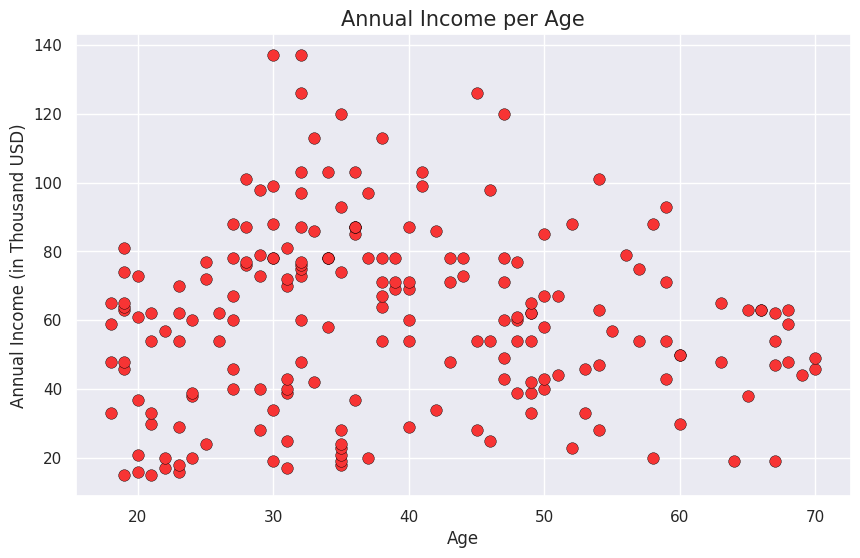

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set(font_scale=1.1)

ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], color='#f73434', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income per Age', fontsize = 15)
plt.show()

#### Distribution of "Annual Income" with respect to "Gender"

In [31]:
data[data['Gender']=='Male'].Annual_Income.describe().round(2)

count     88.00
mean      62.23
std       26.64
min       15.00
25%       45.50
50%       62.50
75%       78.00
max      137.00
Name: Annual_Income, dtype: float64

In [32]:
data[data['Gender']=='Female'].Annual_Income.describe().round(2)

count    112.00
mean      59.25
std       26.01
min       16.00
25%       39.75
50%       60.00
75%       77.25
max      126.00
Name: Annual_Income, dtype: float64

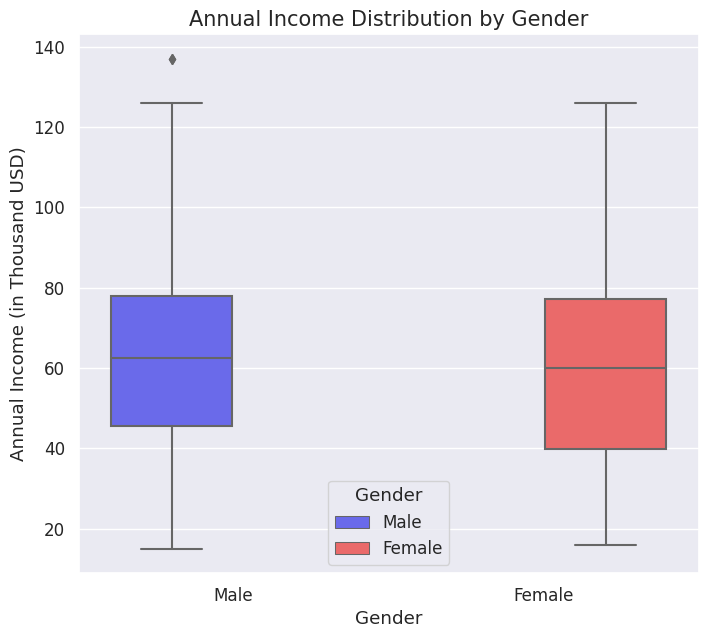

In [33]:
fig, ax = plt.subplots(figsize=(8,7))
sns.set(font_scale=1.1)
ax = sns.boxplot(x=data['Gender'], y=data["Annual_Income"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 15)
plt.show()

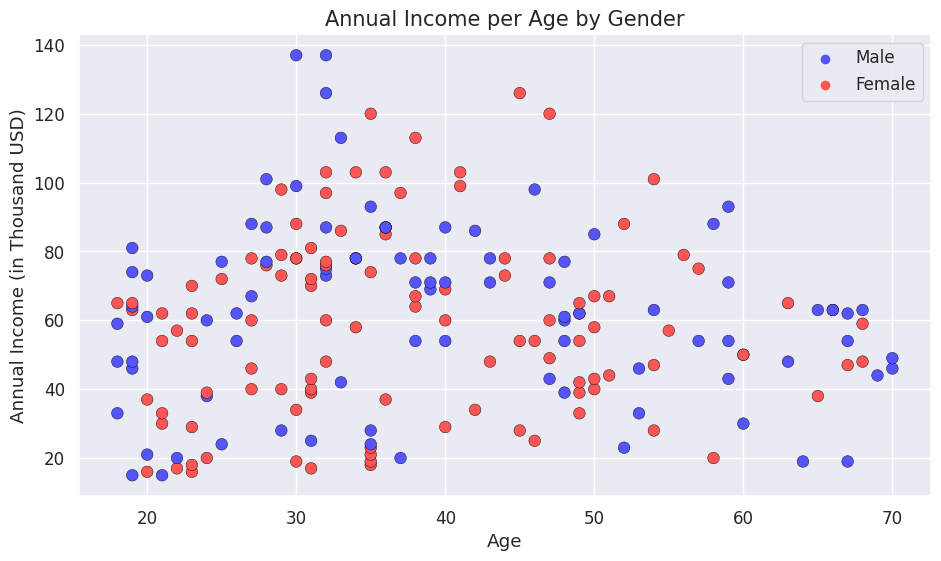

In [34]:
fig, ax = plt.subplots(figsize=(11,6))
sns.set(font_scale=1.1)

ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')
ax.legend(loc ='upper right')

plt.title('Annual Income per Age by Gender', fontsize = 15)
plt.show()

In [35]:
# fig, ax = plt.subplots(figsize=(15,7))
#sns.set(font_scale=1.5)
#ax = sns.violinplot(y=data['Annual_Income'],x=data['Gender'])
#ax.set_ylabel('Annual Income (in Thousand USD)')

#plt.title('Annual Income Distribution by Gender', fontsize = 20)
#plt.show()

## Visualization for the feature "Spending Score"

In [36]:
data['Spending_Score'].head()

0    39
1    81
2     6
3    77
4    40
Name: Spending_Score, dtype: int64

In [37]:
data['Spending_Score'].describe().round(2)

count    200.00
mean      50.20
std       25.82
min        1.00
25%       34.75
50%       50.00
75%       73.00
max       99.00
Name: Spending_Score, dtype: float64

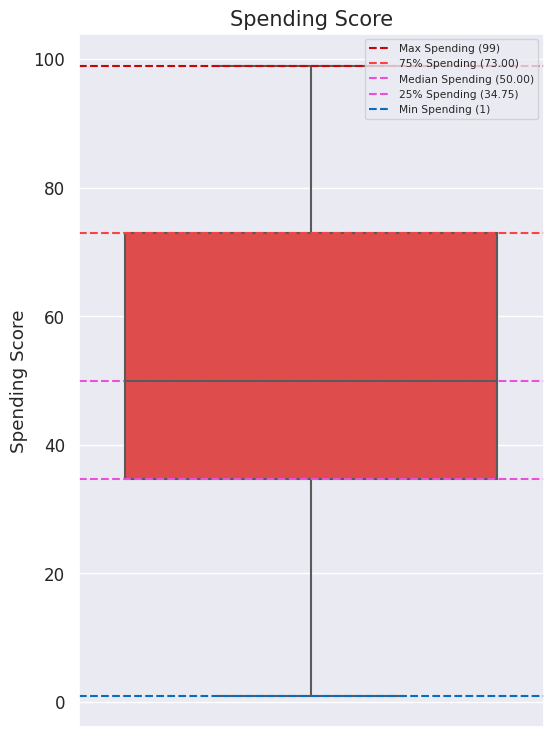

In [38]:
fig, ax = plt.subplots(figsize=(6,9))
sns.set(font_scale=1.1)

ax = sns.boxplot(y=data['Spending_Score'], color="#f73434")
ax.axhline(y=data['Spending_Score'].max(), linestyle='--',color='#c90404', label=f'Max Spending ({data.Spending_Score.max()})')
ax.axhline(y=data['Spending_Score'].describe()[6], linestyle='--',color='#f74343', label=f'75% Spending ({data.Spending_Score.describe()[6]:.2f})')
ax.axhline(y=data['Spending_Score'].median(), linestyle='--',color='#eb50db', label=f'Median Spending ({data.Spending_Score.median():.2f})')
ax.axhline(y=data['Spending_Score'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Spending ({data.Spending_Score.describe()[4]:.2f})')
ax.axhline(y=data['Spending_Score'].min(), linestyle='--',color='#046ebf', label=f'Min Spending ({data.Spending_Score.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('Spending Score')

plt.title('Spending Score', fontsize = 15)
plt.show()

### Spending score w.r.t. Age

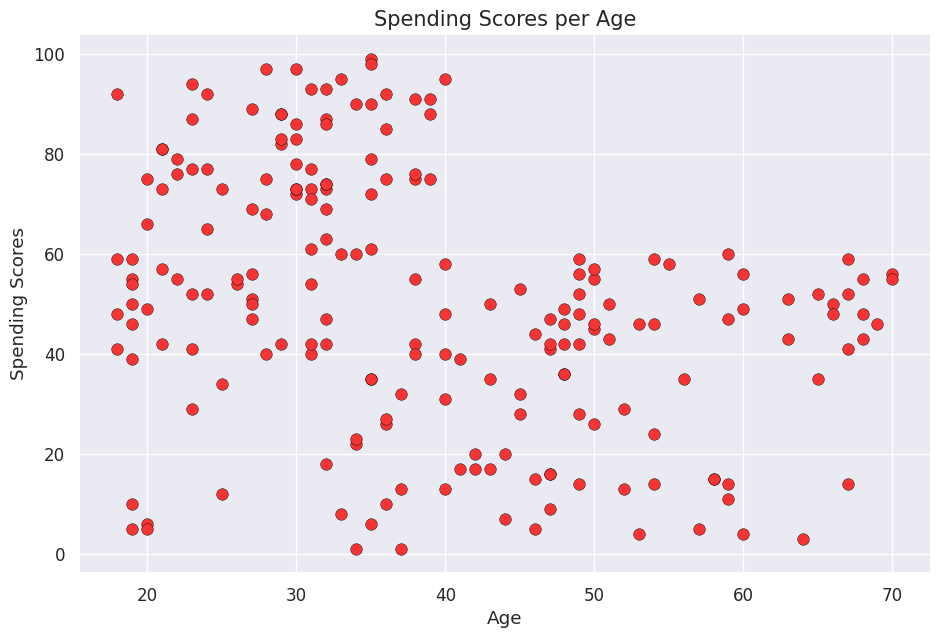

In [39]:
fig, ax = plt.subplots(figsize=(11,7))
sns.set(font_scale=1.1)
ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')

plt.title('Spending Scores per Age', fontsize = 15)
plt.show()

#### **Gender** wise ditribution of **Spending Score**

In [40]:
data[data['Gender']=='Male'].Spending_Score.describe().round(2)

count    88.00
mean     48.51
std      27.90
min       1.00
25%      24.50
50%      50.00
75%      70.00
max      97.00
Name: Spending_Score, dtype: float64

In [41]:
data[data['Gender']=='Female'].Spending_Score.describe().round(2)

count    112.00
mean      51.53
std       24.11
min        5.00
25%       35.00
50%       50.00
75%       73.00
max       99.00
Name: Spending_Score, dtype: float64

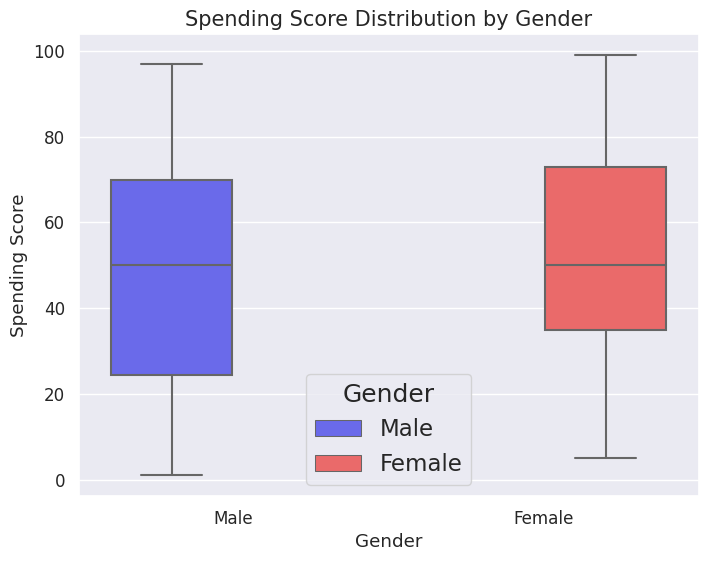

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Spending_Score"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Spending Score')

plt.title('Spending Score Distribution by Gender', fontsize = 15)
plt.show()

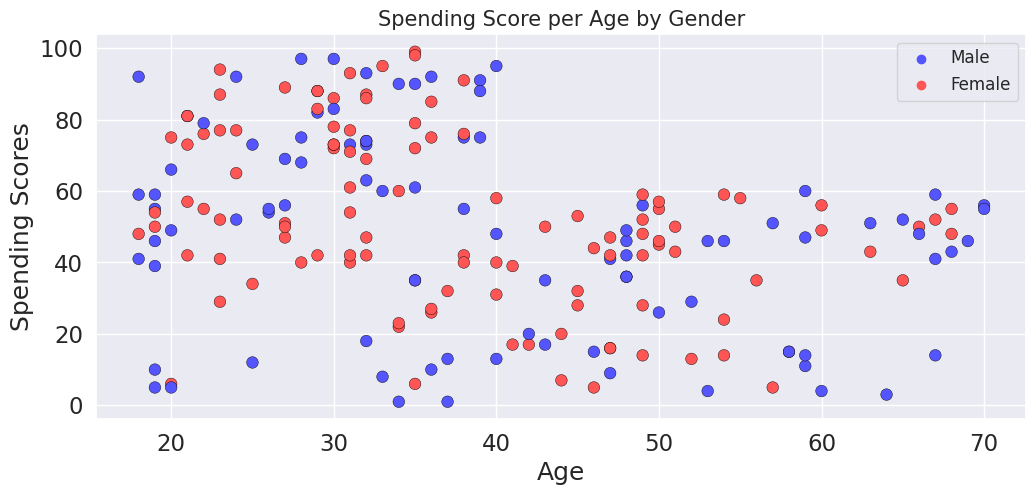

In [43]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set(font_scale=1.1)
ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)

ax.set_ylabel('Spending Scores')
ax.legend(loc ='upper right')
plt.title('Spending Score per Age by Gender', fontsize = 15)
plt.show()

In [44]:
#fig, ax = plt.subplots(figsize=(15,7))
#sns.set(font_scale=1.5)
#ax = sns.violinplot(y=data['Spending_Score'],x=data['Gender'])
#ax.set_ylabel('Spending Scores')

#plt.title('Spending Score distribution by Gender', fontsize = 20)
#plt.show()

# Model:  K - Means Clustering

* K-means clustering is a clustering algorithm that aims to **partition 'n' observations into 'k' clusters**.
* **K** initial “means” (centroids) are generated at random
* **Assignment** – K clusters are created by associating each observation with the nearest centroid
* **Update** – The centroid of the clusters becomes the **new mean**,
* Assignment and Update are repeated iteratively until convergence.
* The end result is that the **sum of squared errors is minimised between points and their respective centroids**.
* At first we will find the **optimal clusters based on inertia** and using **elbow method**.
* The *distance between the centroids and the data points should be less*.

In [45]:
# checking whether we have any missing or NaN available in our data, since they may ruin the model.

data.isna().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [46]:
df = data[["CustomerID","Gender","Age","Annual_Income","Spending_Score"]]
X = df[["Annual_Income","Spending_Score"]]

We have chosen 2 features - **Annual Incom**e and **Spending Score** for our clustering model

In [47]:
X.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


We need to visualize the data which we are going to use for the clustering. This will give us a fair idea about the data we're working on.


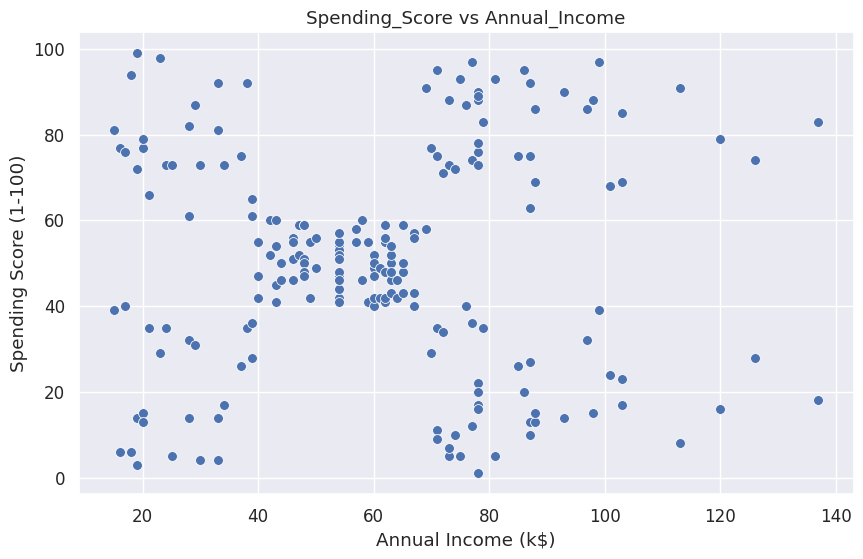

In [48]:
#Scatterplot of the input data

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual_Income',y = 'Spending_Score',  data = X  ,s = 50 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending_Score vs Annual_Income')
plt.show()

## Determining the number of clusters required

**The Elbow Method**

* The Elbow method runs k-means clustering on the dataset for a **range of values for k (say from 1-10)** and then for each value of k computes an average score for all clusters.
* By default, the distortion score is computed, the **sum of square distances from each point to its assigned center**.

* When these overall metrics for each model are plotted, it is possible to visually determine the best value for k.
* If the **line chart looks like an arm**, then the **“elbow” (the point of inflection on the curve) is the best value of k**.
* The “arm” can be either up or down, but if there is a **strong inflection point**, it is a **good indication that the underlying model fits best at that point**.

* We use the Elbow Method which uses **Within Cluster Sum Of Squares (WCSS)** against the the number of clusters (K Value) to figure out the **optimal number of clusters value**.
* WCSS **measures sum of distances of observations from their cluster centroids**.


In [49]:
clustering_data = data.iloc[:,[3,4]]
clustering_data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

Inertia can be recognized as a measure of how internally coherent clusters are.

#### Visualizing the Elbow Method to determine the number of optimal clusters for our dataset

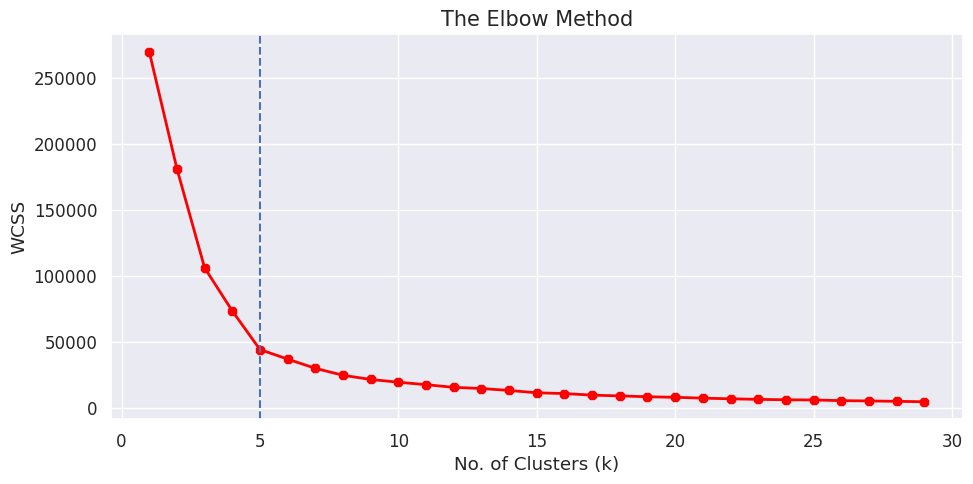

In [51]:
#The elbow curve

fig, ax = plt.subplots(figsize=(11,5))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")

plt.axvline(x=5, ls='--')

plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')

plt.title('The Elbow Method', fontsize = 15)
plt.show()

The optimal number of clusters for our data are 5, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 5, it would be difficult to visualize the elbow if we choose the higher range.

## Building the Clustering Model

* We shall use n_clusters = 5 i.e. 5 clusters as we have determined by the elbow method, which would be optimal for our dataset.

* Our data set is for unsupervised learning therefore we will use **fit_predict()** Suppose we were working with supervised learning data set we would use **fit_tranform()**


In [52]:
#Taking 5 clusters
km = KMeans(n_clusters=5, init='k-means++')

#Fitting the input data
km.fit(clustering_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

Now that we have the clusters created, we will enter them into a different column

In [53]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = km.fit_predict(clustering_data)

clusters.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Annual_Income,Spending_Score,Cluster_Prediction
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4




We can also get the centroids of the clusters by the cluster_centers_ attribute of KMeans algorithm.


In [54]:
km.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

Now we have all the data we need, we just need to plot the data. We will plot the data using scatterplot which will allow us to observe different clusters in different colours.


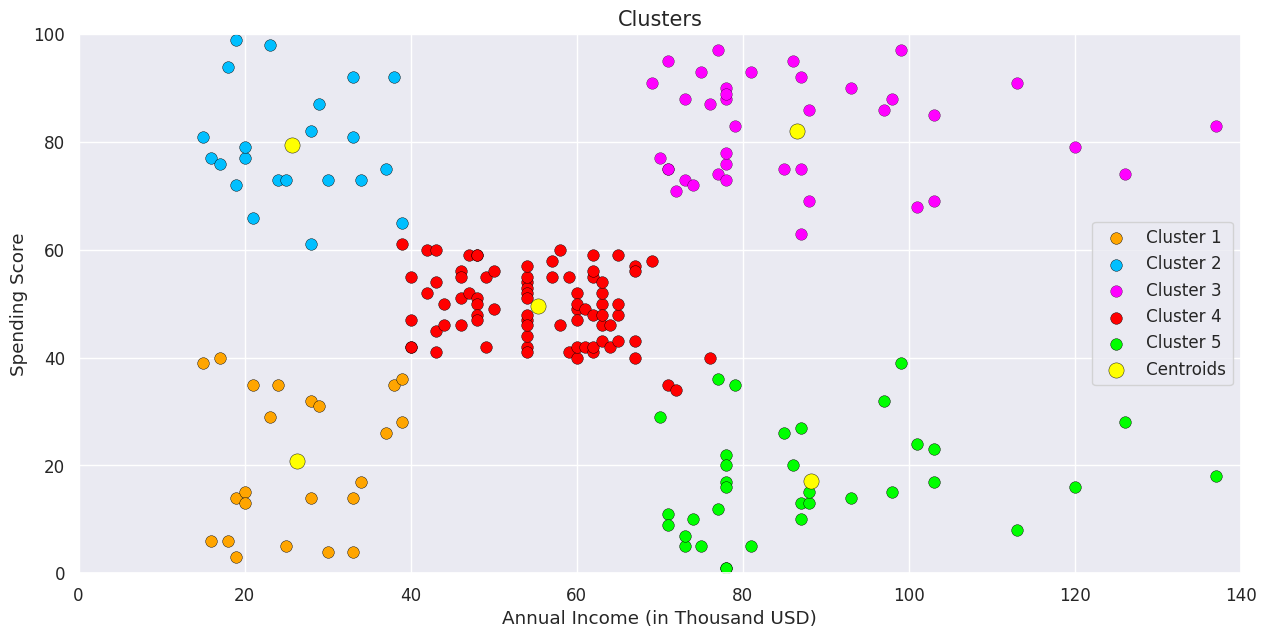

In [55]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')



plt.scatter(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 15)
plt.show()



## Analysing the individual clusters

Analyzing the data using the above visualization becomes much more easier as it gives us a visual aid for better understanding of the customers of mall from the dataset. Kmeans has divided the dataset into 5 clusters based on the 2 features - "Annual income" and "Spending score" of the individual customers. The following clusters are created by the model,

    Cluster Orange
    Cluster Blue
    Cluster Purple
    Cluster Red
    Cluster Green

This way of visualization provides us more insights.


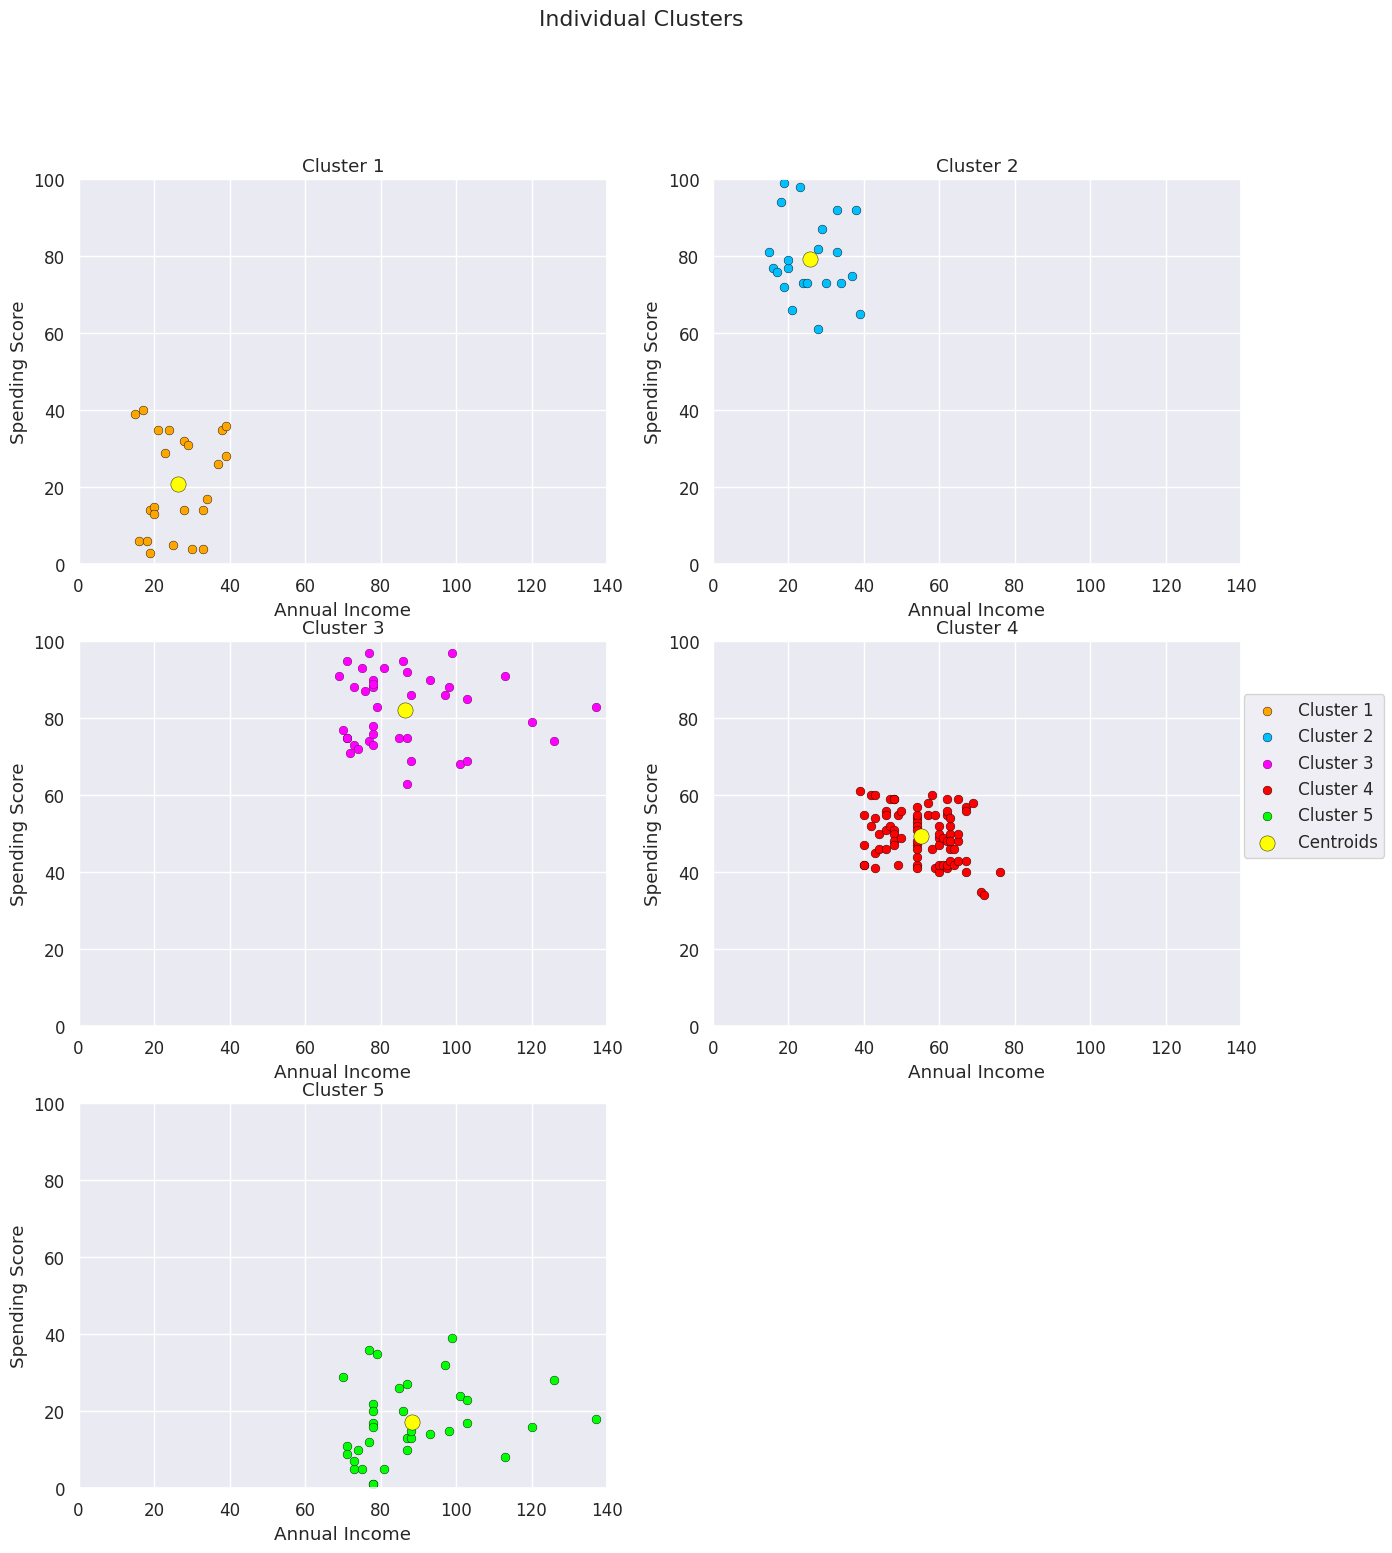

In [56]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,17))
ax[0,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')
ax[0,0].scatter(x=km.cluster_centers_[4,0], y=km.cluster_centers_[4,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 1')

ax[0,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')
ax[0,1].scatter(x=km.cluster_centers_[0,0], y=km.cluster_centers_[0,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 2')

ax[1,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')
ax[1,0].scatter(x=km.cluster_centers_[2,0], y=km.cluster_centers_[2,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 3')

ax[1,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')
ax[1,1].scatter(x=km.cluster_centers_[1,0], y=km.cluster_centers_[1,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 4')

ax[2,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')
ax[2,0].scatter(x=km.cluster_centers_[3,0], y=km.cluster_centers_[3,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3, label='Centroids')
ax[2,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 5')

fig.delaxes(ax[2,1])
fig.legend(loc='right')
fig.suptitle('Individual Clusters')
plt.show()

## Insights from the Individual Clusters

1. **Cluster 1** : Orange clusters -- The annual incomes of the cluster 1 are less then 60 k$ and their spending scores are also low.

2. **Cluster 2** : Blue clusters -- These customers have a low annual incomes but that does not affect their spending score as they are high i.e. more than 50.

3. **Cluster 3** : Purple clusters -- The spending score of these customers are high as their incomes are also high.

4. **Cluster 4** : Red clusters -- These customers represent an average level of spending score and their annual incomes are inbetween range i.e. 40-60 k$.

5. **Cluster 5** : Green clusters -- Eventhough the annual incomes are high, the customers spending score are low i.e. below 40.

# Conclusion

From the above insights, we can conclude that using customer segmentation with a technique called clustering, we have analysed the annual incomes and spending scores of the customers of a mall for the purchasing behavior of customers who might spend more money there.

Also, these customers are clustered separately based on their 2 features - spending score and annual income. Applying K-means clustering method, we got 5 clusters individually.

After the detailed study of the individual clusters behaviour, we can tell that the cluster 3 (purple cluster) have more chance of spending their salary for purchasing and they can be trustable customers.